In [9]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.vector_mediator import VectorMediator
from hazma.scalar_mediator import ScalarMediator

This function makes nice $\LaTeX$ labels for different final states

In [2]:
def get_tex_label(fs):
    tex_label = r"$"+ fs
    tex_label = tex_label.replace("pi0", "\pi^0")
    tex_label = tex_label.replace("pi pi", "\pi^+ \pi^-")
    tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
    tex_label = tex_label.replace("g", "\gamma")
    tex_label = tex_label.replace("e e", "e^+ e^-")
    return tex_label + r"$"

def get_color(fs):
    fss = sorted(list(set(ScalarMediator.list_final_states() + VectorMediator.list_final_states())))
    return list(plt.rcParams["axes.prop_cycle"])[fss.index(fs)]["color"]

## Branching fractions as a function of $g_{Vuu}$ and $g_{Vdd}$

First, create an array with 500 linearly spaces values of $g_{Vdd}/g_{Vuu}$ to scan over:

In [3]:
ratio_min, ratio_max, n_ratios = -3, 3, 500
ratios = np.linspace(ratio_min, ratio_max, n_ratios)

Next, initialize the vector mediator class. We set all ancillary couplings to zero; we will soon change $g_{Vdd}$ in our scan. We take $m_\chi = 250$ MeV, the upper limit of validity for this model. The final plot below changes little with $m_\chi$; the primary changes are that the $\pi^+ \pi^- \pi^0$ channel shuts off below $m_\chi \approx 210$ MeV and the narrow region around $g_{Vuu} = g_{Vdd}$ where the $\pi^+ \pi^-$ channel becomes inaccessible broadens slightly.

In [4]:
vm_args = {"mx": 250., "mv": 1000., "gvxx": 1., "gvuu": 1., "gvdd": 1., "gvss": 0., "gvee": 0., "gvmumu": 0.}
vm = VectorMediator(**vm_args)

Now we compute the branching fractions for each value of $g_{Vdd} / g_{Vuu}$. To avoid dividing by zero, it's necessary to give the DM a small amount of kinetic energy by setting its velocity equal to the usual $10^{-3}c$. We store the dictionaries returned by `branching_fractions()` in the list `bfs_raw`.

In [5]:
vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for ratio in ratios:
    vm.gvdd = vm.gvuu * ratio
    bfs_raw.append(vm.branching_fractions(2. * vm.mx * (1. + 0.5 * vx_mw)))

This turns our list of dictionaries of branching fractions into a dictionary of lists of branching fractions:

In [6]:
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in vm.list_final_states()}

Finally, we iterate over the final states to which $V$ has nonzero couplings and plot their branching fractions. The branching fractions for the different final states are equal to zero for a certain ratio of the couplings:

* $\pi^+ \pi^-$: $g_{Vuu} = g_{Vdd}$
* $\pi^+ \pi^- \pi^0$: $g_{Vuu} = -g_{Vdd}$
* $\pi^0 \gamma$: $g_{Vuu} = -\frac{1}{2}g_{Vdd}$

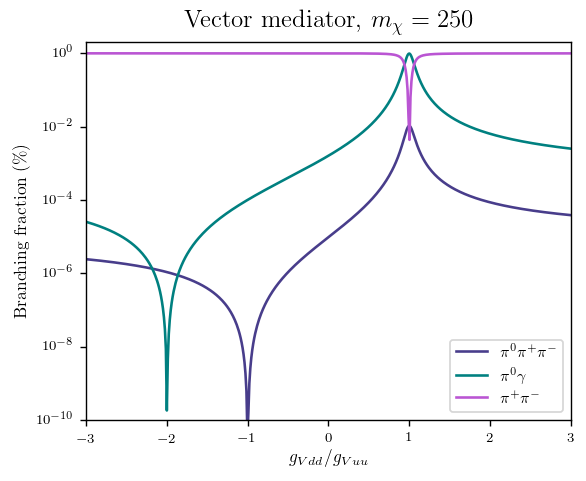

In [11]:
plt.figure(figsize=(5, 4))

for fs, bf_list in bfs.iteritems():
    if fs not in ["e e", "mu mu", "v v"]:
        plt.plot(ratios, bf_list, color=get_color(fs), label=get_tex_label(fs))

plt.yscale("log")
plt.title("Vector mediator, $m_\chi = %.0f$" % vm.mx)
plt.xlabel(r"$g_{Vdd} / g_{Vuu}$")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(ratios[[0, -1]])
plt.ylim(1e-10, 2)

plt.savefig("figures/vector_branching_fractions.pdf")